##Explicar si un modelo de redes neuronales convolucionales varia en la precisión de sus resultados cuando se modifica la dimensión de la imagen de manera desproporcional o se transforma una imagen a color a una monocromática.
1. Modificación desproporcionada de la dimensión de la imagen:

  * Pérdida de información espacial: Cuando
redimensionas una imagen de manera desproporcionada, como cambiar su relación de aspecto de forma significativa, se produce una pérdida de información espacial. Las CNN están diseñadas para detectar patrones y características en regiones locales de la imagen. Si estiras o comprimes la imagen, los patrones y las relaciones espaciales se distorsionan, lo que dificulta que el modelo detecte las características correctamente.

  * Problemas de escala: Las CNN a menudo utilizan filtros de convolución de tamaño fijo que se desplazan por la imagen. Cuando la dimensión de la imagen se modifica drásticamente, es posible que los filtros ya no sean adecuados para capturar las características relevantes a diferentes escalas, lo que puede resultar en una disminución en la precisión.

2. Transformación de una imagen a monocromática:

  * Pérdida de información de color: Las imágenes a color contienen información adicional en forma de canales de color (generalmente RGB), que las CNN pueden utilizar para mejorar la detección de características y la discriminación de objetos. Cuando conviertes una imagen a escala de grises, se pierde esta información de color, lo que puede hacer que el modelo sea menos preciso, especialmente en tareas donde el color es importante (por ejemplo, reconocimiento de objetos basado en el color).

  * Arquitectura no optimizada para monocromático: Algunas CNN están diseñadas específicamente para trabajar con imágenes a color y pueden no funcionar tan bien en imágenes monocromáticas. Los pesos y las capas de una CNN pueden estar optimizados para capturar patrones en imágenes a color y no ser tan efectivos en imágenes en escala de grises.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#https://www.kaggle.com/datasets/kaggleashwin/vehicle-type-recognition

In [ ]:
import zipfile

with zipfile.ZipFile('/content/drive/MyDrive/Datasets/Dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [ ]:
import os

PATH = 'Dataset'

classes = os.listdir(PATH)
classes

['Truck', 'motorcycle', 'Car', 'Bus']

In [ ]:
imgs, labels = [], []

for i, lab in enumerate(classes):
  paths = os.listdir(f'{PATH}/{lab}')
  print(f'Categoría: {lab}. Imágenes: {len(paths)}')
  paths = [p for p in paths if p[-3:] == "jpg"]
  imgs += [f'{PATH}/{lab}/{img}' for img in paths]
  labels += [i]*len(paths)

Categoría: Truck. Imágenes: 100
Categoría: motorcycle. Imágenes: 100
Categoría: Car. Imágenes: 100
Categoría: Bus. Imágenes: 100


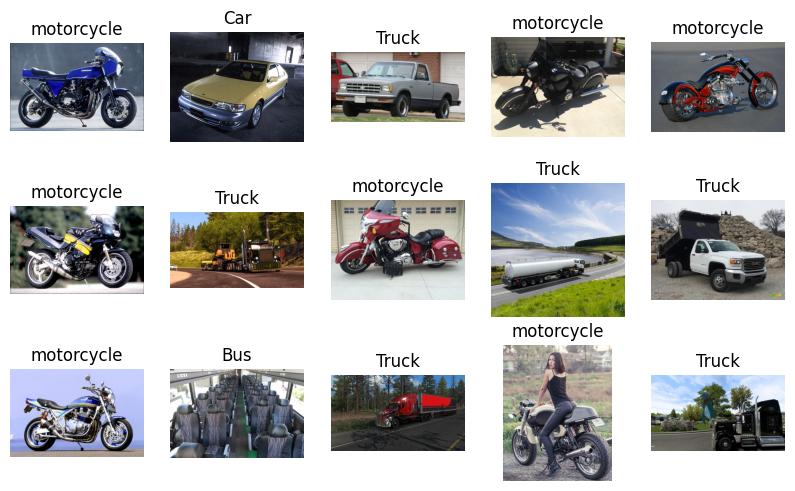

In [ ]:
import random
from skimage import io
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3,5, figsize=(10,6))
for _ax in axs:
  for ax in _ax:
    ix = random.randint(0, len(imgs)-1)
    img = io.imread(imgs[ix])
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(classes[labels[ix]])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

train_imgs, test_imgs, train_labels, test_labels = train_test_split(imgs, labels, test_size=0.2, stratify=labels)

len(train_imgs), len(test_imgs)

(320, 80)

In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

class Dataset(torch.utils.data.Dataset):
  def __init__(self, X, y, trans, device):
    self.X = X
    self.y = y
    self.trans = trans
    self.device = device

  def __len__(self):
    return len(self.X)

  def __getitem__(self, ix):
    # cargar la imágen
    img = io.imread(self.X[ix])
    # aplicar transformaciones
    #print(f"imagen: {img}")
    if self.trans:
      img = self.trans(image=img)["image"]
    return torch.from_numpy(img / 255.).float().permute(2,0,1), torch.tensor(self.y[ix])

In [ ]:
import albumentations as A

trans = A.Compose([
    A.Resize(224, 224)
])

dataset = {
    'train': Dataset(train_imgs, train_labels, trans, device),
    'test': Dataset(test_imgs, test_labels, trans, device)
}

len(dataset['train']), len(dataset['test'])

(320, 80)

In [ ]:
dataset['train'][2]

(tensor([[[0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          ...,
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9882, 0.9882],
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9882, 0.9882],
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9882, 0.9882]],
 
         [[0.9804, 0.9804, 0.9804,  ..., 0.9804, 0.9804, 0.9804],
          [0.9804, 0.9804, 0.9804,  ..., 0.9804, 0.9804, 0.9804],
          [0.9804, 0.9804, 0.9804,  ..., 0.9804, 0.9804, 0.9804],
          ...,
          [0.9804, 0.9804, 0.9804,  ..., 0.9804, 0.9804, 0.9804],
          [0.9804, 0.9804, 0.9804,  ..., 0.9804, 0.9804, 0.9804],
          [0.9804, 0.9804, 0.9804,  ..., 0.9804, 0.9804, 0.9804]],
 
         [[0.9843, 0.9843, 0.9843,  ..., 0.9843, 0.9843, 0.9843],
          [0.9843, 0.9843, 0.9843,  ..., 0.9843, 0.9843, 0.9843],
          [0.9843, 0.9843, 0.9843,  ...,

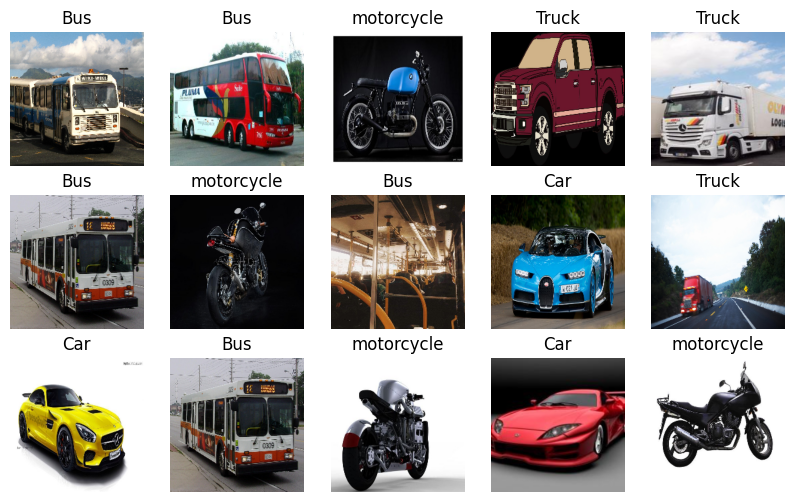

In [ ]:
fig, axs = plt.subplots(3,5, figsize=(10,6))
for _ax in axs:
  for ax in _ax:
    ix = random.randint(0, len(dataset['train'])-1)
    img, lab = dataset['train'][ix]
    ax.imshow(img.permute(1,2,0))
    ax.axis('off')
    ax.set_title(classes[lab])
plt.show()

In [ ]:
dataloader = {
    'train': torch.utils.data.DataLoader(dataset['train'], batch_size=64, shuffle=True, pin_memory=True),
    'test': torch.utils.data.DataLoader(dataset['test'], batch_size=100, shuffle=False)
}

imgs, labels = next(iter(dataloader['train']))
imgs.shape

torch.Size([64, 3, 224, 224])

In [ ]:
import torchvision

wide_resnet = torchvision.models.wide_resnet50_2()
wide_resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), strid

In [ ]:
class ModelCustom(torch.nn.Module):
  def __init__(self, n_outputs=5, pretrained=False, freeze=False):
    super().__init__()
    # descargamos wide_resnet
    wide_resnet = torchvision.models.wide_resnet50_2(weights=None)
    # nos quedamos con todas las capas menos la última
    self.wide_resnet = torch.nn.Sequential(*list(wide_resnet.children())[:-1])
    if freeze:
      for param in self.wide_resnet.parameters():
        param.requires_grad=False
    # añadimos una nueva capa lineal para llevar a cabo la clasificación
    self.fc = torch.nn.Linear(2048, n_outputs)

  def forward(self, x):
    x = self.wide_resnet(x)
    x = x.view(x.shape[0], -1)
    x = self.fc(x)
    return x

  def unfreeze(self):
    for param in self.wide_resnet.parameters():
        param.requires_grad=True

In [ ]:
model_custom = ModelCustom()
outputs = model_custom(torch.randn(64, 3, 224, 224))
outputs.shape

torch.Size([64, 5])

In [ ]:
from tqdm import tqdm
import numpy as np

def fit(model, dataloader, epochs=5, lr=1e-2):
    model.to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    criterion = torch.nn.CrossEntropyLoss()
    for epoch in range(1, epochs+1):
        model.train()
        train_loss, train_acc = [], []
        bar = tqdm(dataloader['train'])
        for batch in bar:
            X, y = batch
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = model(X)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
            acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
            train_acc.append(acc)
            bar.set_description(f"loss {np.mean(train_loss):.5f} acc {np.mean(train_acc):.5f}")
        bar = tqdm(dataloader['test'])
        val_loss, val_acc = [], []
        model.eval()
        with torch.no_grad():
            for batch in bar:
                X, y = batch
                X, y = X.to(device), y.to(device)
                y_hat = model(X)
                loss = criterion(y_hat, y)
                val_loss.append(loss.item())
                acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
                val_acc.append(acc)
                bar.set_description(f"val_loss {np.mean(val_loss):.5f} val_acc {np.mean(val_acc):.5f}")
        print(f"Epoch {epoch}/{epochs} loss {np.mean(train_loss):.5f} val_loss {np.mean(val_loss):.5f} acc {np.mean(train_acc):.5f} val_acc {np.mean(val_acc):.5f}")

In [ ]:
#Entrenando desde cero
model_c = ModelCustom()
fit(model_c, dataloader, epochs=15)

val_loss 2.07545 val_acc 0.25000: 100%|██████████| 1/1 [00:02<00:00,  2.65s/it]


Epoch 1/15 loss 4.18606 val_loss 2.07545 acc 0.22500 val_acc 0.25000


val_loss 1.70860 val_acc 0.25000: 100%|██████████| 1/1 [00:02<00:00,  2.38s/it]


Epoch 2/15 loss 4.83382 val_loss 1.70860 acc 0.25000 val_acc 0.25000


val_loss 1.77143 val_acc 0.25000: 100%|██████████| 1/1 [00:02<00:00,  2.39s/it]


Epoch 3/15 loss 2.74101 val_loss 1.77143 acc 0.27813 val_acc 0.25000


val_loss 1.65591 val_acc 0.25000: 100%|██████████| 1/1 [00:02<00:00,  2.35s/it]


Epoch 4/15 loss 2.21228 val_loss 1.65591 acc 0.29375 val_acc 0.25000


val_loss 1.49883 val_acc 0.23750: 100%|██████████| 1/1 [00:02<00:00,  2.36s/it]


Epoch 5/15 loss 2.21270 val_loss 1.49883 acc 0.29063 val_acc 0.23750


val_loss 1.99932 val_acc 0.28750: 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]


Epoch 6/15 loss 2.04543 val_loss 1.99932 acc 0.25000 val_acc 0.28750


val_loss 1.97322 val_acc 0.25000: 100%|██████████| 1/1 [00:01<00:00,  1.77s/it]


Epoch 7/15 loss 2.89759 val_loss 1.97322 acc 0.24063 val_acc 0.25000


val_loss 1.94283 val_acc 0.26250: 100%|██████████| 1/1 [00:01<00:00,  1.82s/it]


Epoch 8/15 loss 2.26355 val_loss 1.94283 acc 0.25938 val_acc 0.26250


val_loss 1.54226 val_acc 0.27500: 100%|██████████| 1/1 [00:01<00:00,  1.80s/it]


Epoch 9/15 loss 1.79929 val_loss 1.54226 acc 0.28750 val_acc 0.27500


val_loss 2.24595 val_acc 0.25000: 100%|██████████| 1/1 [00:01<00:00,  1.77s/it]


Epoch 10/15 loss 2.05870 val_loss 2.24595 acc 0.20938 val_acc 0.25000


val_loss 1.76753 val_acc 0.25000: 100%|██████████| 1/1 [00:01<00:00,  1.78s/it]


Epoch 11/15 loss 1.56347 val_loss 1.76753 acc 0.28125 val_acc 0.25000


val_loss 2.09145 val_acc 0.25000: 100%|██████████| 1/1 [00:01<00:00,  1.81s/it]


Epoch 12/15 loss 1.71231 val_loss 2.09145 acc 0.27500 val_acc 0.25000


val_loss 3.59880 val_acc 0.25000: 100%|██████████| 1/1 [00:01<00:00,  1.82s/it]


Epoch 13/15 loss 2.18043 val_loss 3.59880 acc 0.22187 val_acc 0.25000


val_loss 1.62972 val_acc 0.25000: 100%|██████████| 1/1 [00:01<00:00,  1.80s/it]


Epoch 14/15 loss 1.86314 val_loss 1.62972 acc 0.25312 val_acc 0.25000


val_loss 2.88825 val_acc 0.25000: 100%|██████████| 1/1 [00:01<00:00,  1.81s/it]

Epoch 15/15 loss 1.69968 val_loss 2.88825 acc 0.26250 val_acc 0.25000


In [ ]:
#Transfer Learning
model_c = ModelCustom(pretrained=True, freeze=True)
fit(model_c, dataloader)

val_loss 2.06620 val_acc 0.25000: 100%|██████████| 1/1 [00:01<00:00,  1.66s/it]


Epoch 1/5 loss 3.98221 val_loss 2.06620 acc 0.19375 val_acc 0.25000


val_loss 2.02859 val_acc 0.25000: 100%|██████████| 1/1 [00:02<00:00,  2.34s/it]


Epoch 2/5 loss 5.36236 val_loss 2.02859 acc 0.25000 val_acc 0.25000


val_loss 3.00740 val_acc 0.25000: 100%|██████████| 1/1 [00:01<00:00,  1.87s/it]


Epoch 3/5 loss 6.52447 val_loss 3.00740 acc 0.24688 val_acc 0.25000


val_loss 3.57752 val_acc 0.25000: 100%|██████████| 1/1 [00:01<00:00,  1.87s/it]


Epoch 4/5 loss 6.19194 val_loss 3.57752 acc 0.25938 val_acc 0.25000


val_loss 2.64942 val_acc 0.25000: 100%|██████████| 1/1 [00:02<00:00,  2.57s/it]

Epoch 5/5 loss 3.73187 val_loss 2.64942 acc 0.26250 val_acc 0.25000


In [ ]:
#Fine Tuning
model_c = ModelCustom(pretrained=True, freeze=False)
fit(model_c, dataloader)

val_loss 1.85396 val_acc 0.25000: 100%|██████████| 1/1 [00:01<00:00,  1.76s/it]


Epoch 1/5 loss 3.27709 val_loss 1.85396 acc 0.24063 val_acc 0.25000


val_loss 1.75970 val_acc 0.26250: 100%|██████████| 1/1 [00:02<00:00,  2.10s/it]


Epoch 2/5 loss 5.10336 val_loss 1.75970 acc 0.25000 val_acc 0.26250


val_loss 1.87614 val_acc 0.25000: 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]


Epoch 3/5 loss 2.40525 val_loss 1.87614 acc 0.25312 val_acc 0.25000


val_loss 1.69020 val_acc 0.22500: 100%|██████████| 1/1 [00:02<00:00,  2.24s/it]


Epoch 4/5 loss 2.56991 val_loss 1.69020 acc 0.26562 val_acc 0.22500


val_loss 1.64715 val_acc 0.25000: 100%|██████████| 1/1 [00:02<00:00,  2.17s/it]

Epoch 5/5 loss 2.06345 val_loss 1.64715 acc 0.29063 val_acc 0.25000


In [ ]:
model_o = ModelCustom(pretrained=True, freeze=True)
fit(model_o, dataloader)
model_o.unfreeze()
fit(model_o, dataloader, lr=1e-4)

val_loss 2.21555 val_acc 0.25000: 100%|██████████| 1/1 [00:01<00:00,  1.75s/it]


Epoch 1/5 loss 2.60209 val_loss 2.21555 acc 0.27813 val_acc 0.25000


val_loss 2.29171 val_acc 0.25000: 100%|██████████| 1/1 [00:01<00:00,  1.76s/it]


Epoch 2/5 loss 4.79170 val_loss 2.29171 acc 0.22187 val_acc 0.25000


val_loss 3.21289 val_acc 0.25000: 100%|██████████| 1/1 [00:01<00:00,  1.99s/it]


Epoch 3/5 loss 5.49444 val_loss 3.21289 acc 0.24688 val_acc 0.25000


val_loss 3.43540 val_acc 0.25000: 100%|██████████| 1/1 [00:01<00:00,  1.80s/it]


Epoch 4/5 loss 6.25345 val_loss 3.43540 acc 0.25938 val_acc 0.25000


val_loss 3.33051 val_acc 0.26250: 100%|██████████| 1/1 [00:02<00:00,  2.19s/it]


Epoch 5/5 loss 4.53926 val_loss 3.33051 acc 0.29375 val_acc 0.26250


val_loss 3.33093 val_acc 0.23750: 100%|██████████| 1/1 [00:02<00:00,  2.38s/it]


Epoch 1/5 loss 5.08396 val_loss 3.33093 acc 0.25000 val_acc 0.23750


val_loss 3.28069 val_acc 0.25000: 100%|██████████| 1/1 [00:02<00:00,  2.29s/it]


Epoch 2/5 loss 4.72712 val_loss 3.28069 acc 0.26250 val_acc 0.25000


val_loss 3.24360 val_acc 0.25000: 100%|██████████| 1/1 [00:02<00:00,  2.28s/it]


Epoch 3/5 loss 4.43058 val_loss 3.24360 acc 0.27813 val_acc 0.25000


val_loss 3.16334 val_acc 0.25000: 100%|██████████| 1/1 [00:02<00:00,  2.24s/it]


Epoch 4/5 loss 4.25260 val_loss 3.16334 acc 0.29375 val_acc 0.25000


val_loss 3.07368 val_acc 0.25000: 100%|██████████| 1/1 [00:01<00:00,  1.94s/it]

Epoch 5/5 loss 3.95726 val_loss 3.07368 acc 0.29063 val_acc 0.25000


In [ ]:
optimizer = torch.optim.Adam([
    {'params': model_o.wide_resnet.parameters(), 'lr': 1e-4},
    {'params': model_o.fc.parameters(), 'lr': 1e-3}
])

In [ ]:
from tqdm import tqdm
import numpy as np

def fit(model, dataloader, epochs=5, lr_wide_resnet=1e-4, lr_fc=1e-3):
    model.to(device)
    optimizer = optimizer = torch.optim.Adam([{'params': model.wide_resnet.parameters(), 'lr': lr_wide_resnet},{'params': model.fc.parameters(), 'lr': lr_fc}])
    criterion = torch.nn.CrossEntropyLoss()
    for epoch in range(1, epochs+1):
        model.train()
        train_loss, train_acc = [], []
        bar = tqdm(dataloader['train'])
        for batch in bar:
            X, y = batch
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = model(X)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
            acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
            train_acc.append(acc)
            bar.set_description(f"loss {np.mean(train_loss):.5f} acc {np.mean(train_acc):.5f}")
        bar = tqdm(dataloader['test'])
        val_loss, val_acc = [], []
        model.eval()
        with torch.no_grad():
            for batch in bar:
                X, y = batch
                X, y = X.to(device), y.to(device)
                y_hat = model(X)
                loss = criterion(y_hat, y)
                val_loss.append(loss.item())
                acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
                val_acc.append(acc)
                bar.set_description(f"val_loss {np.mean(val_loss):.5f} val_acc {np.mean(val_acc):.5f}")
        print(f"Epoch {epoch}/{epochs} loss {np.mean(train_loss):.5f} val_loss {np.mean(val_loss):.5f} acc {np.mean(train_acc):.5f} val_acc {np.mean(val_acc):.5f}")

In [ ]:
model_o = ModelCustom(pretrained=True, freeze=True)
fit(model_o, dataloader, lr_wide_resnet=1e-4, lr_fc=1e-3)
model_o.unfreeze()
fit(model_o, dataloader, lr_wide_resnet=1e-4, lr_fc=1e-3)

val_loss 1.45670 val_acc 0.25000: 100%|██████████| 1/1 [00:02<00:00,  2.74s/it]


Epoch 1/5 loss 1.69973 val_loss 1.45670 acc 0.24688 val_acc 0.25000


val_loss 1.43744 val_acc 0.25000: 100%|██████████| 1/1 [00:01<00:00,  1.92s/it]


Epoch 2/5 loss 1.65500 val_loss 1.43744 acc 0.23750 val_acc 0.25000


val_loss 1.46737 val_acc 0.25000: 100%|██████████| 1/1 [00:01<00:00,  1.84s/it]


Epoch 3/5 loss 1.54312 val_loss 1.46737 acc 0.25312 val_acc 0.25000


val_loss 1.43714 val_acc 0.25000: 100%|██████████| 1/1 [00:01<00:00,  1.98s/it]


Epoch 4/5 loss 1.48229 val_loss 1.43714 acc 0.26250 val_acc 0.25000


val_loss 1.45922 val_acc 0.25000: 100%|██████████| 1/1 [00:02<00:00,  2.05s/it]


Epoch 5/5 loss 1.42875 val_loss 1.45922 acc 0.27813 val_acc 0.25000


val_loss 1.40256 val_acc 0.27500: 100%|██████████| 1/1 [00:02<00:00,  2.74s/it]


Epoch 1/5 loss 1.75133 val_loss 1.40256 acc 0.32500 val_acc 0.27500


val_loss 1.64864 val_acc 0.25000: 100%|██████████| 1/1 [00:02<00:00,  2.60s/it]


Epoch 2/5 loss 1.77495 val_loss 1.64864 acc 0.30938 val_acc 0.25000


val_loss 2.09970 val_acc 0.25000: 100%|██████████| 1/1 [00:02<00:00,  2.48s/it]


Epoch 3/5 loss 1.44650 val_loss 2.09970 acc 0.35625 val_acc 0.25000


val_loss 1.96604 val_acc 0.32500: 100%|██████████| 1/1 [00:02<00:00,  2.43s/it]


Epoch 4/5 loss 1.23851 val_loss 1.96604 acc 0.42500 val_acc 0.32500


val_loss 2.53827 val_acc 0.26250: 100%|██████████| 1/1 [00:02<00:00,  2.41s/it]

Epoch 5/5 loss 1.01968 val_loss 2.53827 acc 0.57188 val_acc 0.26250
